# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
(summary_ob_f07, context_ob_f07, model_ob_f07, metric_ob_f07) = pickle.load(open( '19-02-01_results_over_baseline_faces_07.p', "rb"))
(summary_ob_f05, context_ob_f05, model_ob_f05, metric_ob_f05) = pickle.load(open( '19-02-01_results_over_baseline_faces_05.p', "rb"))
(summary_ob_f03, context_ob_f03, model_ob_f03, metric_ob_f03) = pickle.load(open( '19-02-01_results_over_baseline_faces_03.p', "rb"))

## Get the SIM scores

In [8]:
sim_table = summary[:,:,1]
sim_f03_table = summary_f03[:,:,1]
sim_f05_table = summary_f05[:,:,1]
sim_f07_table = summary_f07[:,:,1]

## Change scores into DataFrames

In [9]:
SIM = pd.DataFrame(data=sim_table, columns=model, index=context)
SIM.columns.name='models'
SIM.index.name='context'

SIM = SIM.transpose()

faces = SIM.loc['faces']
dg = SIM.loc['dg']
SIM = SIM.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

SIM

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.529256,0.504981,0.568607,0.472232,0.535764,0.478441
cas,0.521473,0.496486,0.561978,0.459220,0.525020,0.490274
covsal,0.528376,0.520976,0.540371,0.516241,0.507251,0.502744
gbvs,0.579692,0.547139,0.632463,0.532250,0.586402,0.524310
icf,0.540450,0.520813,0.572283,0.480500,0.534348,0.493894
ik,0.483443,0.458229,0.524316,0.440349,0.498116,0.439303
sun,0.436436,0.400730,0.494317,0.374971,0.449312,0.347440


In [10]:
faces

context
all           0.380547
person        0.381124
no person     0.324046
animal        0.281475
electronic    0.410412
sports        0.323161
Name: faces, dtype: float64

In [11]:
SIM['mean context'] = SIM.mean(axis=1)
SIM = SIM.transpose()
SIM['mean model'] = SIM.mean(axis=1)
SIM = SIM.transpose()
SIM

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.529256,0.504981,0.568607,0.472232,0.535764,0.478441,0.514880
cas,0.521473,0.496486,0.561978,0.459220,0.525020,0.490274,0.509075
covsal,0.528376,0.520976,0.540371,0.516241,0.507251,0.502744,0.519326
gbvs,0.579692,0.547139,0.632463,0.532250,0.586402,0.524310,0.567043
icf,0.540450,0.520813,0.572283,0.480500,0.534348,0.493894,0.523715
ik,0.483443,0.458229,0.524316,0.440349,0.498116,0.439303,0.473959
sun,0.436436,0.400730,0.494317,0.374971,0.449312,0.347440,0.417201
mean model,0.517018,0.492765,0.556334,0.467966,0.519459,0.468058,0.503600


In [12]:
SIM_mean_model = SIM.loc['mean model']
SIM_mean_context = SIM.transpose().loc['mean context']

In [13]:
SIM_f03 = pd.DataFrame(data=sim_f03_table, columns=model_f03, index=context_f03)
SIM_f03.columns.name='models'
SIM_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
SIM_f03 = SIM_f03.rename(index=str, columns=col).transpose()

SIM_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.535489,0.515820,0.567375,0.473084,0.547418,0.482798
cas,0.525728,0.503291,0.562292,0.459744,0.533971,0.493499
covsal,0.540867,0.540492,0.541474,0.519671,0.528012,0.510934
gbvs,0.583638,0.553899,0.631847,0.532606,0.594117,0.527445
icf,0.547291,0.531809,0.572388,0.482032,0.545444,0.500319
ik,0.490019,0.468970,0.524140,0.441561,0.508954,0.445144
sun,0.441578,0.409820,0.493058,0.375098,0.458578,0.350194


In [14]:
SIM_f03['mean context'] = SIM_f03.mean(axis=1)
SIM_f03 = SIM_f03.transpose()
SIM_f03['mean model'] = SIM_f03.mean(axis=1)
SIM_f03 = SIM_f03.transpose()
SIM_f03

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.535489,0.515820,0.567375,0.473084,0.547418,0.482798,0.520331
cas,0.525728,0.503291,0.562292,0.459744,0.533971,0.493499,0.513087
covsal,0.540867,0.540492,0.541474,0.519671,0.528012,0.510934,0.530241
gbvs,0.583638,0.553899,0.631847,0.532606,0.594117,0.527445,0.570592
icf,0.547291,0.531809,0.572388,0.482032,0.545444,0.500319,0.529880
ik,0.490019,0.468970,0.524140,0.441561,0.508954,0.445144,0.479798
sun,0.441578,0.409820,0.493058,0.375098,0.458578,0.350194,0.421388
mean model,0.523516,0.503443,0.556082,0.469114,0.530928,0.472905,0.509331


In [15]:
SIM_f03_mean_model = SIM_f03.loc['mean model']
SIM_f03_mean_context = SIM_f03.transpose().loc['mean context']

In [16]:
SIM_f05 = pd.DataFrame(data=sim_f05_table, columns=model_f05, index=context_f05)
SIM_f05.columns.name='models'
SIM_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
SIM_f05 = SIM_f05.rename(index=str, columns=col).transpose()

SIM_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.542495,0.527066,0.567506,0.475102,0.558768,0.488953
cas,0.530474,0.511503,0.561227,0.461105,0.540870,0.497408
covsal,0.550315,0.555510,0.541893,0.522584,0.543866,0.518601
gbvs,0.588542,0.561783,0.631919,0.533836,0.602438,0.531272
icf,0.552661,0.540406,0.572526,0.483636,0.554154,0.504156
ik,0.496925,0.480040,0.524296,0.443189,0.519886,0.451064
sun,0.448339,0.420649,0.493226,0.376733,0.469726,0.355033


In [17]:
SIM_f05['mean context'] = SIM_f05.mean(axis=1)
SIM_f05 = SIM_f05.transpose()
SIM_f05['mean model'] = SIM_f05.mean(axis=1)
SIM_f05 = SIM_f05.transpose()
SIM_f05

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.542495,0.527066,0.567506,0.475102,0.558768,0.488953,0.526648
cas,0.530474,0.511503,0.561227,0.461105,0.540870,0.497408,0.517098
covsal,0.550315,0.555510,0.541893,0.522584,0.543866,0.518601,0.538795
gbvs,0.588542,0.561783,0.631919,0.533836,0.602438,0.531272,0.574965
icf,0.552661,0.540406,0.572526,0.483636,0.554154,0.504156,0.534590
ik,0.496925,0.480040,0.524296,0.443189,0.519886,0.451064,0.485900
sun,0.448339,0.420649,0.493226,0.376733,0.469726,0.355033,0.427284
mean model,0.529964,0.513851,0.556085,0.470884,0.541387,0.478070,0.515040


In [18]:
SIM_f05_mean_model = SIM_f05.loc['mean model']
SIM_f05_mean_context = SIM_f05.transpose().loc['mean context']

In [19]:
SIM_f07 = pd.DataFrame(data=sim_f07_table, columns=model_f07, index=context_f07)
SIM_f07.columns.name='models'
SIM_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
SIM_f07 = SIM_f07.rename(index=str, columns=col).transpose()

SIM_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.549862,0.539012,0.567449,0.477050,0.569102,0.496495
cas,0.538440,0.524250,0.561443,0.463732,0.553208,0.503983
covsal,0.555271,0.563686,0.541629,0.524548,0.551776,0.524843
gbvs,0.595868,0.573428,0.632245,0.536224,0.614022,0.537579
icf,0.557546,0.548177,0.572734,0.485544,0.562260,0.506198
ik,0.505718,0.494144,0.524479,0.445401,0.532979,0.459770
sun,0.458123,0.436317,0.493472,0.379859,0.485290,0.363897


In [20]:
SIM_f07['mean context'] = SIM_f07.mean(axis=1)
SIM_f07 = SIM_f07.transpose()
SIM_f07['mean model'] = SIM_f07.mean(axis=1)
SIM_f07 = SIM_f07.transpose()
SIM_f07

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.549862,0.539012,0.567449,0.477050,0.569102,0.496495,0.533162
cas,0.538440,0.524250,0.561443,0.463732,0.553208,0.503983,0.524176
covsal,0.555271,0.563686,0.541629,0.524548,0.551776,0.524843,0.543626
gbvs,0.595868,0.573428,0.632245,0.536224,0.614022,0.537579,0.581561
icf,0.557546,0.548177,0.572734,0.485544,0.562260,0.506198,0.538743
ik,0.505718,0.494144,0.524479,0.445401,0.532979,0.459770,0.493749
sun,0.458123,0.436317,0.493472,0.379859,0.485290,0.363897,0.436159
mean model,0.537261,0.525574,0.556207,0.473194,0.552662,0.484681,0.521597


In [21]:
SIM_f07_mean_model = SIM_f07.loc['mean model']
SIM_f07_mean_context = SIM_f07.transpose().loc['mean context']

## Create Mean Matrices

In [22]:
mean_models = pd.DataFrame([SIM_mean_model,
                            SIM_f03_mean_model,
                            SIM_f05_mean_model,
                            SIM_f07_mean_model], index=[0,0.3,0.5,0.7])

mean_models = mean_models.transpose()
mean_models = mean_models.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
mean_models

,0.0,0.3,0.5,0.7
context,,,,
all,0.517018,0.523516,0.529964,0.537261
person,0.492765,0.503443,0.513851,0.525574
no person,0.556334,0.556082,0.556085,0.556207
animal,0.467966,0.469114,0.470884,0.473194
electronic,0.519459,0.530928,0.541387,0.552662
sports,0.468058,0.472905,0.478070,0.484681


In [23]:
mean_contexts = pd.DataFrame([SIM_mean_context,
                              SIM_f03_mean_context,
                              SIM_f05_mean_context,
                              SIM_f07_mean_context], index=[0,0.3,0.5,0.7])
mean_contexts

models,aim,cas,covsal,gbvs,icf,ik,sun,mean model
0.0,0.514880,0.509075,0.519326,0.567043,0.523715,0.473959,0.417201,0.503600
0.3,0.520331,0.513087,0.530241,0.570592,0.529880,0.479798,0.421388,0.509331
0.5,0.526648,0.517098,0.538795,0.574965,0.534590,0.485900,0.427284,0.515040
0.7,0.533162,0.524176,0.543626,0.581561,0.538743,0.493749,0.436159,0.521597


In [24]:
mean_contexts = mean_contexts.transpose()
mean_contexts = mean_contexts.loc[['aim', 'cas','covsal', 'gbvs', 'icf', 'ik', 'sun']]
mean_contexts

,0.0,0.3,0.5,0.7
models,,,,
aim,0.514880,0.520331,0.526648,0.533162
cas,0.509075,0.513087,0.517098,0.524176
covsal,0.519326,0.530241,0.538795,0.543626
gbvs,0.567043,0.570592,0.574965,0.581561
icf,0.523715,0.529880,0.534590,0.538743
ik,0.473959,0.479798,0.485900,0.493749
sun,0.417201,0.421388,0.427284,0.436159


## Vizualization

### Data Prep

In [25]:
SIM0 = SIM.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
SIM0 = SIM0.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

SIMmean_context = SIM.transpose().loc[['mean context']]
SIMmean_context = SIMmean_context.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

SIMmean_model = SIM.loc[['mean model']]
SIMmean_model = SIMmean_model.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [26]:
SIM0_f03 = SIM_f03.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
SIM0_f03 = SIM0_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

SIMmean_context_f03 = SIM_f03.transpose().loc[['mean context']]
SIMmean_context_f03 = SIMmean_context_f03.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

SIMmean_model_f03 = SIM_f03.loc[['mean model']]
SIMmean_model_f03 = SIMmean_model_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [27]:
SIM0_f05 = SIM_f05.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
SIM0_f05 = SIM0_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

SIMmean_context_f05 = SIM_f05.transpose().loc[['mean context']]
SIMmean_context_f05 = SIMmean_context_f05.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

SIMmean_model_f05 = SIM_f05.loc[['mean model']]
SIMmean_model_f05 = SIMmean_model_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [28]:
SIM0_f07 = SIM_f07.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
SIM0_f07 = SIM0_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

SIMmean_context_f07 = SIM_f07.transpose().loc[['mean context']]
SIMmean_context_f07 = SIMmean_context_f07.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

SIMmean_model_f07 = SIM_f07.loc[['mean model']]
SIMmean_model_f07 = SIMmean_model_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

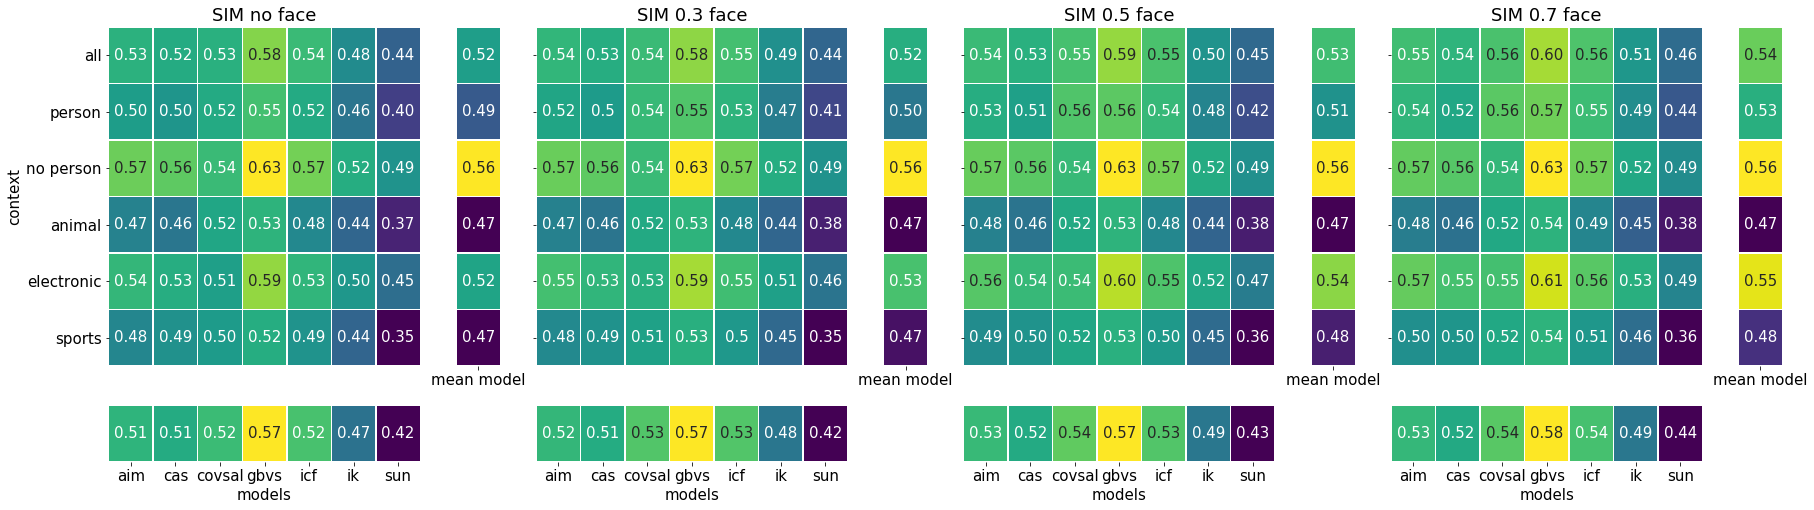

In [30]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 8,
                       width_ratios=[7, 1, 7, 1, 7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[8])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[10])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[12])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[14])

im = sns.heatmap(SIM0, annot=True, linewidths=.5, ax=ax01, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(SIMmean_model, annot=True, linewidths=.5, ax=ax02, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(SIMmean_context, annot=True, linewidths=.5, ax=ax03, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(SIM0_f03, annot=True, linewidths=.5, ax=ax11, cmap='viridis', cbar=False, xticklabels='');
sns.heatmap(SIMmean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(SIMmean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(SIM0_f05, annot=True, linewidths=.5, ax=ax21, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(SIMmean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(SIMmean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(SIM0_f07, annot=True, linewidths=.5, ax=ax31, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(SIMmean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(SIMmean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

# ax01.tick_params(labelrotation=-90)

ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('SIM no face');
ax11.set_title('SIM 0.3 face');
ax21.set_title('SIM 0.5 face');
ax31.set_title('SIM 0.7 face');
# plt.set_fontsize(20)
# ax31.set_fontsize(20)



plt.savefig('plots/SIM_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)


In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('SIM results');
# plt.savefig('plots/SIM_all_with_mean.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots(1, 4,figsize=(30, 10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(SIM_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(SIM_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
sns.heatmap(SIM_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('SIM plain');
ax[1].set_title('SIM f03');
ax[2].set_title('SIM f05');
ax[3].set_title('SIM f07');
# plt.savefig('plots/SIM_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

## Vizualization of means

In [ ]:
matplotlib.rcParams.update({'font.size': 20})


f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax, fmt='.3f');

# plt.title('SIM scores of different models');
plt.ylabel('Weight of face influence')
plt.xticks(rotation=90)

plt.savefig('plots/SIM_performance_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
matplotlib.rcParams.update({'font.size': 20})

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax, fmt='.3f');
# plt.title('SIM scores of different contexts');
plt.ylabel('Weight of face influence')

plt.savefig('plots/SIM_performance_mean_model.jpg', bbox_inches='tight', pad_inches=0)

### Calculate the relative error

In [ ]:
SIM0 = SIM.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'mean model']]

In [ ]:
SIM_diff_f03 = ((SIM_f03 - SIM0) / SIM0)*100
SIM_diff_f05 = ((SIM_f05 - SIM0) / SIM0)*100
SIM_diff_f07 = ((SIM_f07 - SIM0) / SIM0)*100

#### Get mean of models and mean of contexts in diff out

In [ ]:
mean_model_diff_f03 = SIM_diff_f03.loc['mean model']
mean_model_diff_f05 = SIM_diff_f05.loc['mean model']
mean_model_diff_f07 = SIM_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

In [ ]:
mean_context_diff_f03 = SIM_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = SIM_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = SIM_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

## Vizualize relative errors

In [ ]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(SIM_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(SIM_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(SIM_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('SIM rel err f03');
ax[1].set_title('SIM rel err f05');
ax[2].set_title('SIM rel err f07');
# plt.savefig('plots/SIM_sep_diff_with_mean.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('SIM mean_models relative error');
# plt.savefig('plots/SIM_mean_models_diff.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_context_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('SIM mean_models relative error');
# plt.savefig('plots/SIM_mean_contexts_diff.jpg', bbox_inches='tight', pad_inches=0)

#### Combine both plots

In [ ]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
matplotlib.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(11, 9));
mean_context_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel('SIM score change [%]');

plt.savefig('plots/SIM_improvment_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

matplotlib.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(11, 9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel('SIM score change [%]');

plt.savefig('plots/SIM_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

mean_context_diff.plot.bar(ax=ax[0]);
mean_models_diff.plot.bar(ax=ax[1]);

mappable = im.get_children()[0]

ax[0].set_title('score change across models')
ax[1].set_title('score change across contexts')

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)
ax[0].set_ylabel('SIM score change [%]');


plt.savefig('plots/SIM_improvements_mean_both.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

im = sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax[1], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('mean SIM score across models')
ax[1].set_title('mean SIM score across contexts')
ax[0].set_ylabel(r'$\alpha$ face weight')
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

plt.savefig('plots/SIM_performance_mean_both.jpg', bbox_inches='tight', pad_inches=0)